# Workshop 4
## Classification

![Slide 1](files/slides/Slide1.png)

---
## Workshop 4: Principles of Data Science

![Slide 2](files/slides/Slide2.png)

---
## We Are Recording Now!

![Slide 3](files/slides/Slide3.png)

---
## Workshop 4: Learning Outcomes

![Slide 4](files/slides/Slide4.png)

---
## Workshop Agenda

![Slide 5](files/slides/Slide5.png)

---
## How You'll Cover Supervised ML

![Slide 6](files/slides/Slide6.png)

---
## Calculating Risk for Classification

![Slide 7](files/slides/Slide7.png)

---
## Calculating Risk for Classification

![Slide 7](files/slides/Slide7a.png)

---
## Logistic Regression

![Slide 8](files/slides/Slide8.png)

---
## Logistic Regression

![Slide 9](files/slides/Slide9.png)

---
## Binary Classification

![Slide 10](files/slides/Slide10.png)

---
## Assumptions

![Slide 11](files/slides/Slide11.png)

---
## Assumptions

![Slide 12](files/slides/Slide12.png)

---
## Assumptions

![Slide 13](files/slides/Slide13.png)

**Syntax reference — checking for multi-collinearity:**

```python
# Correlation matrix — values close to +1 or -1 mean features are highly correlated
df.corr()

# Visualise as a heatmap (easier to spot patterns)
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
```

*You'll use this in the activity when preparing your data.*

---
## The Model

![Slide 14](files/slides/Slide14.png)

---
## The Model

![Slide 15](files/slides/Slide15.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

# Toy data — a small, simple dataset used to illustrate a concept (standard ML terminology)
# Here: hours studied vs pass/fail (0 = Fail, 1 = Pass)
hours = np.array([0.25, 0.7, 1.0, 1.25, 1.5, 1.75, 2.0, 2.2,
                  2.5, 3.0, 3.0, 3.5, 4.0, 4.2, 4.5, 5.0])
passed = np.array([0, 0, 0, 0, 0, 1, 0, 1,
                   0, 0, 1, 0, 1, 1, 1, 1])

# Fit a logistic regression model
# reshape(-1, 1) converts the 1D array into a 2D column (scikit-learn expects 2D input)
log_model = LogisticRegression()
log_model.fit(hours.reshape(-1, 1), passed)

# Fit a linear regression on the same data for comparison
lin_model = LinearRegression()
lin_model.fit(hours.reshape(-1, 1), passed)

# Create 300 evenly spaced points from 0 to 6 for a smooth curve
# linspace(start, stop, num_points) generates the points; reshape makes it 2D for sklearn
x_range = np.linspace(0, 6, 300).reshape(-1, 1)

# Get the predicted probabilities from the logistic model
# predict_proba returns [[P(class=0), P(class=1)]] for each point — we want column 1 (P(Pass))
y_prob = log_model.predict_proba(x_range)[:, 1]

# Find the decision boundary — the number of hours where probability = 0.5
# For logistic regression: boundary = -intercept / coefficient
# These are the model's learned parameters, accessible via .intercept_ and .coef_
boundary_hours = -log_model.intercept_[0] / log_model.coef_[0][0]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left plot: linear regression — shows why a straight line doesn't work for classification
axes[0].scatter(hours, passed, color='steelblue', zorder=5, label='Data')
axes[0].plot(x_range, lin_model.predict(x_range), color='coral', linewidth=2, label='Linear fit')
axes[0].axhline(y=0, color='grey', linestyle='--', alpha=0.3)  # y=0 reference line
axes[0].axhline(y=1, color='grey', linestyle='--', alpha=0.3)  # y=1 reference line
axes[0].set(xlabel='Hours Studied', ylabel='Y', title='Linear Regression', ylim=(-0.3, 1.3))
axes[0].legend()

# Right plot: logistic regression — the sigmoid stays between 0 and 1
axes[1].scatter(hours, passed, color='steelblue', zorder=5, label='Data')
axes[1].plot(x_range, y_prob, color='coral', linewidth=2, label='Sigmoid fit')
axes[1].axhline(y=0.5, color='grey', linestyle=':', alpha=0.5, label='Threshold (0.5)')

# Mark the decision boundary — vertical line where the sigmoid crosses 0.5
axes[1].axvline(x=boundary_hours, color='green', linestyle='--', alpha=0.7,
                label=f'Boundary ({boundary_hours:.1f} hrs)')

axes[1].set(xlabel='Hours Studied', ylabel='Probability of Passing',
            title='Logistic Regression', ylim=(-0.1, 1.1))
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"Decision boundary: ~{boundary_hours:.1f} hours")
print(f"Students studying more than {boundary_hours:.1f} hours are predicted to PASS")
print(f"Students studying fewer than {boundary_hours:.1f} hours are predicted to FAIL")

---
## The Maths

![Slide 16](files/slides/Slide16.png)

---
## The Maths

![Slide 17](files/slides/Slide17.png)

---
## Your Scenario

![Slide 18](files/slides/Slide18.png)

---
## Your Scenario

![Slide 19](files/slides/Slide19.png)

---
## Activity 1: Building a Logistic Regression Model

![Slide 20](files/slides/Slide20.png)

---
# Break ☕️
## Back at [time + 10 min]

![Slide 22](files/slides/Slide22.png)

---
## Activity 1: Feedback and Discussion

![Slide 21](files/slides/Slide21.png)

---
## Decision Trees

![Slide 23](files/slides/Slide23.png)

---
## Decision Tree for Classification

![Slide 24](files/slides/Slide24.png)

**Syntax reference — controlling tree complexity:**

```python
from sklearn.tree import DecisionTreeClassifier

# max_depth: maximum number of "questions" the tree can ask
# min_samples_leaf: each leaf must have at least this many samples
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
```

*Both are hyperparameters you set before training — they prevent overfitting by stopping the tree from getting too specific.*

---
## Decision Tree: Deeper Tree

![Slide 25](files/slides/Slide25.png)

---
## The Maths: Splitting Criteria

![Slide 26](files/slides/Slide26.png)

**Syntax reference — changing the splitting criterion:**

```python
# Default is Gini impurity — usually fine
dt = DecisionTreeClassifier(criterion='gini')

# Alternatives you can experiment with:
dt = DecisionTreeClassifier(criterion='entropy')   # Information Gain
dt = DecisionTreeClassifier(criterion='log_loss')   # Same loss as logistic regression
```

*In practice, Gini and Entropy usually produce very similar trees — the default is a safe choice.*

---
## Application in Loans Data

![Slide 27](files/slides/Slide27.png)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset — a classic ML dataset with 3 flower species
iris = load_iris()

# Filter to only 2 classes (setosa vs versicolor) for binary classification
mask = iris.target < 2
X = iris.data[mask][:, :2]  # Use just the first 2 features (sepal length & width) for simplicity
y = iris.target[mask]        # Target: 0 = Setosa, 1 = Versicolor

# Quick look at the data before we model it
# Wrapping the numpy array in a DataFrame so we can see column names and a tidy preview
print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features\n")
df_preview = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width'])
df_preview['Species'] = ['Setosa' if label == 0 else 'Versicolor' for label in y]
print(df_preview.head(10).to_string(index=False))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree with max_depth=2 (the tree can ask at most 2 questions)
# random_state=42 ensures we get the same tree every time we run this
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X, y)

# Visualise the tree — each node shows the split rule, gini impurity, sample count, and class
fig, ax = plt.subplots(figsize=(14, 6))
plot_tree(dt,
          feature_names=['Sepal Length', 'Sepal Width'],  # Label the features by name
          class_names=['Setosa', 'Versicolor'],           # Label the classes by name
          filled=True,    # Colour nodes by majority class
          rounded=True,   # Rounded box corners
          ax=ax, fontsize=11)
ax.set_title('Decision Tree (2 classes, max_depth=2)', fontsize=14)
plt.tight_layout()
plt.show()

# Summary stats — how complex is the tree, and how well does it fit?
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")
print(f"Training accuracy: {dt.score(X, y):.2%}")

---
## Application in Loans Data

![Slide 28](files/slides/Slide28.png)

---
## Random Forests

![Slide 29](files/slides/Slide29.png)

---
## Random Forests

![Slide 30](files/slides/Slide30.png)

---
## Random Forests: Feature Subsetting

![Slide 31](files/slides/Slide31.png)

---
## Random Forests: Bagging and Voting

![Slide 32](files/slides/Slide32.png)

---
## Random Forests: Majority Voting

![Slide 33](files/slides/Slide33.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Build a random forest using the same iris data (X, y) from the decision tree demo
# n_estimators = number of trees in the forest
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf.fit(X, y)

# Compare accuracy: single tree vs forest
print(f"Single decision tree accuracy: {dt.score(X, y):.2%}")
print(f"Random forest accuracy:        {rf.score(X, y):.2%}")
print(f"Number of trees in forest:     {rf.n_estimators}")

# Feature importances — how much each feature contributed to the forest's decisions
# The activity walk-through uses this same .feature_importances_ attribute
importances = rf.feature_importances_
print(f"\nFeature importances:")
print(f"  Sepal Length: {importances[0]:.1%}")
print(f"  Sepal Width:  {importances[1]:.1%}")

# Quick bar chart of feature importances
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(['Sepal Length', 'Sepal Width'], importances, color=['steelblue', 'coral'])
ax.set_ylabel('Importance')
ax.set_title('Random Forest — Feature Importances')
plt.tight_layout()
plt.show()

---
## Activity 2: Building a Decision Tree

![Slide 34](files/slides/Slide34.png)

---
# Break ☕️
## Back at [time + 10 min]

![Slide 36](files/slides/Slide36.png)

---
## Activity 2: Feedback and Discussion

![Slide 35](files/slides/Slide35.png)

---
## Sampling Bias

![Slide 37](files/slides/Slide37.png)

---
## Sampling Bias in Classification

![Slide 38](files/slides/Slide38.png)

In [ ]:
import pandas as pd

# Create an imbalanced dataset — subscription data from the slide
# 43,456 subscribers vs only 230 who unsubscribed (a ~189:1 ratio)
data = {'subscription': ['Stays Subscribed'] * 43456 + ['Unsubscribed'] * 230}
df = pd.DataFrame(data)

# value_counts() shows how many rows belong to each class
print("Class distribution:")
print(df['subscription'].value_counts())
print()

# The "lazy model": always predict the majority class for every row
# This model doesn't learn anything — it just picks the most common label
total = len(df)
majority = df['subscription'].value_counts().iloc[0]  # Count of the most frequent class
print(f"Lazy model accuracy: {majority:,} / {total:,} = {majority/total:.2%}")
print(f"But it catches ZERO unsubscribers — the whole point of the model!")

---
## Sampling Bias: Real-World Impact

![Slide 39](files/slides/Slide39.png)

---
## Strategies to Address Sampling Bias

![Slide 40](files/slides/Slide40.png)

**Syntax reference — handling class imbalance:**

```python
# Option 1: Re-weight classes — tells the model to pay more attention to the minority class
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

# Option 2: Oversample the minority class using SMOTE (requires imbalanced-learn library)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
```

*For your assignment: at minimum, check whether your classes are balanced. Bonus points for trying one of these strategies.*

---
## Classification Model Evaluation

![Slide 41](files/slides/Slide41.png)

---
## Model Evaluation: Accuracy

![Slide 42](files/slides/Slide42.png)

---
## Model Evaluation: Precision

![Slide 43](files/slides/Slide43.png)

---
## Model Evaluation: Recall

![Slide 44](files/slides/Slide44.png)

---
## Model Evaluation: Venn Diagram

![Slide 45](files/slides/Slide45.png)

---
## The Confusion Matrix

![Slide 46](files/slides/Slide46.png)

---
## The Confusion Matrix

![Slide 47](files/slides/Slide47.png)

---
## The Confusion Matrix

![Slide 48](files/slides/Slide48.png)

---
## The Confusion Matrix: Loans Example

![Slide 49](files/slides/Slide49.png)

Confusion Matrix (rows = actual, cols = predicted):
[[15 61]
 [18  4]]

TP=4  FP=61  FN=18  TN=15
Accuracy:  (TP+TN) / Total = (4+15) / 98 = 19.4%
Precision: TP / (TP+FP) = 4 / (4+61) = 6.2%
Recall:    TP / (TP+FN) = 4 / (4+18) = 18.2%


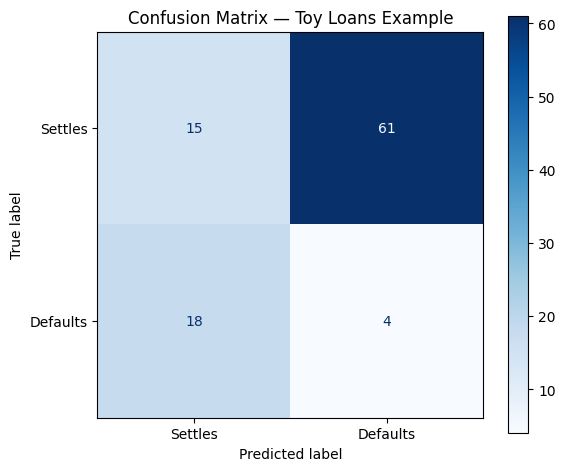

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Toy predictions — simulating a (poor) classifier on loan data
# We manually construct arrays of actual and predicted labels to match the slide's numbers
y_actual =    np.array([1]*22 + [0]*76)   # 22 actual defaults (1), 76 actual settles (0)
y_predicted = np.array([1]*4 + [0]*18 +   # Of 22 actual defaults: model catches 4 (TP), misses 18 (FN)
                        [1]*61 + [0]*15)   # Of 76 actual settles: model wrongly flags 61 (FP), gets 15 right (TN)

# confusion_matrix compares actual vs predicted labels
# Returns a 2x2 grid: [[TN, FP], [FN, TP]]
cm = confusion_matrix(y_actual, y_predicted)

# ravel() flattens the 2x2 grid into 4 separate values
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix (rows = actual, cols = predicted):")
print(cm)

# Calculate the key metrics from the four values
# In practice, sklearn's classification_report() calculates all of these automatically
# — you'll use that in the activity. Here we do it manually to see the maths.
print(f"\nTP={tp}  FP={fp}  FN={fn}  TN={tn}")
print(f"Accuracy:  (TP+TN) / Total = ({tp}+{tn}) / {tp+tn+fp+fn} = {(tp+tn)/(tp+tn+fp+fn):.1%}")
print(f"Precision: TP / (TP+FP) = {tp} / ({tp}+{fp}) = {tp/(tp+fp):.1%}")
print(f"Recall:    TP / (TP+FN) = {tp} / ({tp}+{fn}) = {tp/(tp+fn):.1%}")

# ConfusionMatrixDisplay creates a colour-coded heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm, display_labels=['Settles', 'Defaults']).plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix — Toy Loans Example')
plt.tight_layout()
plt.show()

---
## Receiver Operating Characteristics (ROC)

![Slide 50](files/slides/Slide50.png)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create a toy binary classification dataset with 200 samples and 2 features
np.random.seed(42)                         # Fix the random seed for reproducibility
X_toy = np.random.randn(200, 2)           # 200 rows, 2 random features
# Class label: 1 if (feature1 + feature2 + noise) > 0.5, else 0
y_toy = (X_toy[:, 0] + X_toy[:, 1] + np.random.randn(200) * 0.5 > 0.5).astype(int)

# Simple train/test split — first 140 rows for training, remaining 60 for testing
X_train, X_test = X_toy[:140], X_toy[140:]
y_train, y_test = y_toy[:140], y_toy[140:]

# Fit a logistic regression model on the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Plot the ROC curve — this sweeps through all possible thresholds automatically
# and plots True Positive Rate (y-axis) vs False Positive Rate (x-axis)
fig, ax = plt.subplots(figsize=(7, 6))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name='Logistic Regression')

# The diagonal represents random guessing (AUC = 0.5) — any good model should be above this
ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random guess (AUC = 0.5)')
ax.set_title('ROC Curve — Toy Example')
ax.legend()
plt.tight_layout()
plt.show()

---
## Area Under the Curve (AUC)

![Slide 53](files/slides/Slide53.png)

**Syntax reference — computing AUC as a single number:**

```python
from sklearn.metrics import roc_auc_score

# predict_proba gives probabilities — we want column 1 (probability of the positive class)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC: {auc:.3f}")
```

*AUC > 0.8 is generally "good"; 0.5 means the model is no better than random guessing.*

---
## AUC: Example

![Slide 54](files/slides/Slide54.png)

---
## Activity 3: Evaluating Your Models

![Slide 55](files/slides/Slide55.png)

---
## Activity 3: Feedback and Discussion

![Slide 56](files/slides/Slide56.png)

---
## Workshop Wrap-Up

![Slide 57](files/slides/Slide57.png)

---
## Learning Check

![Slide 58](files/slides/Slide58.png)

---
## Workshop 4: Learning Outcomes

![Slide 59](files/slides/Slide59.png)

---
## Questions and Discussions

![Slide 60](files/slides/Slide60.png)